### Please read the OpenAI documenation for "Embeddings" at this page: https://platform.openai.com/docs/guides/embeddings/use-cases 

---

If you only want your API key to be accessible to a single project, you can create a local .env file which contains the API key and then explicitly use that API key with the Python code shown in the steps to come.

Start by going to the project folder you want to create the .env file in.

In order for your .env file to be ignored by version control, create a .gitignore file in the root of your project directory. Add a line with .env on it which will make sure your API key or other secrets are not accidentally shared via version control.
Once you create the .gitignore and .env files using the terminal or an integrated development environment (IDE), copy your secret API key and set it as the OPENAI_API_KEY in your .env file. If you haven't created a secret key yet, you can do so on the API key page.

The .env file should look like the following:
```

# Once you add your API key below, make sure to not share it with anyone! The API key should remain private.

OPENAI_API_KEY=abc123

```

The API key can be imported by running the code below:
```
from openai import OpenAI

client = OpenAI()
# defaults to getting the key using os.environ.get("OPENAI_API_KEY")
# if you saved the key under a different environment variable name, you can do something like:
# client = OpenAI(
#   api_key=os.environ.get("CUSTOM_ENV_NAME"),
# )
```

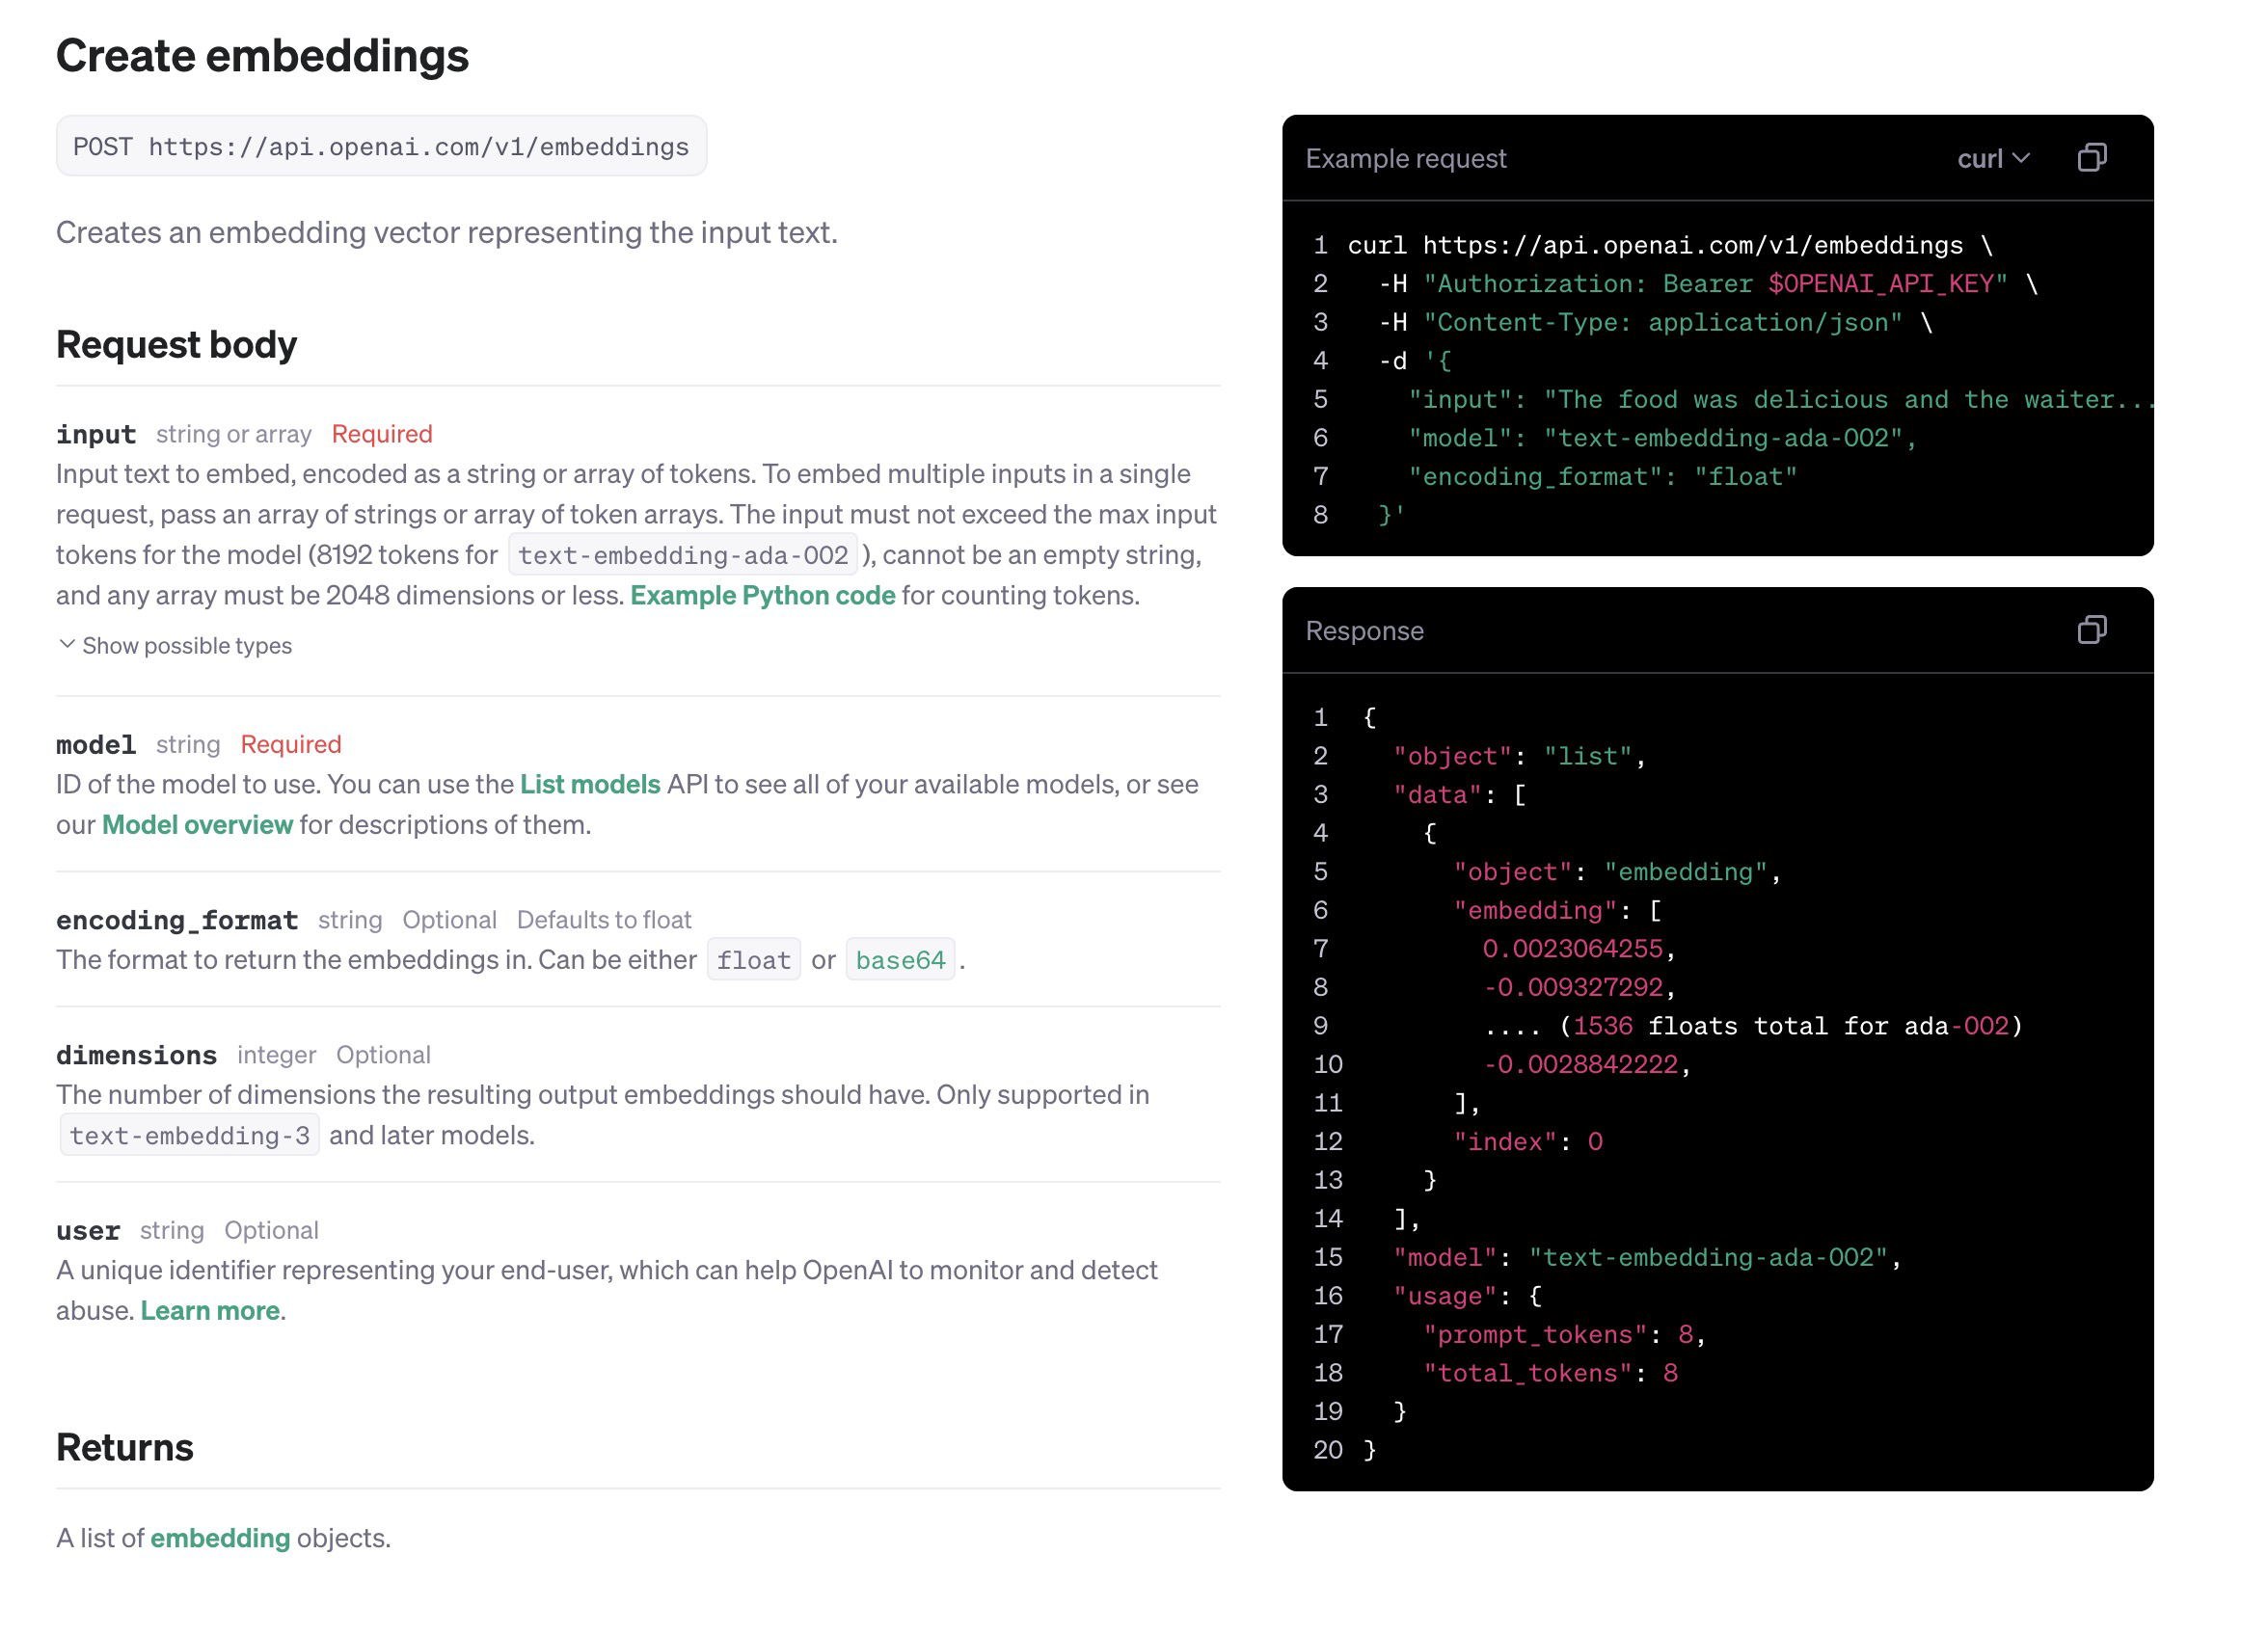

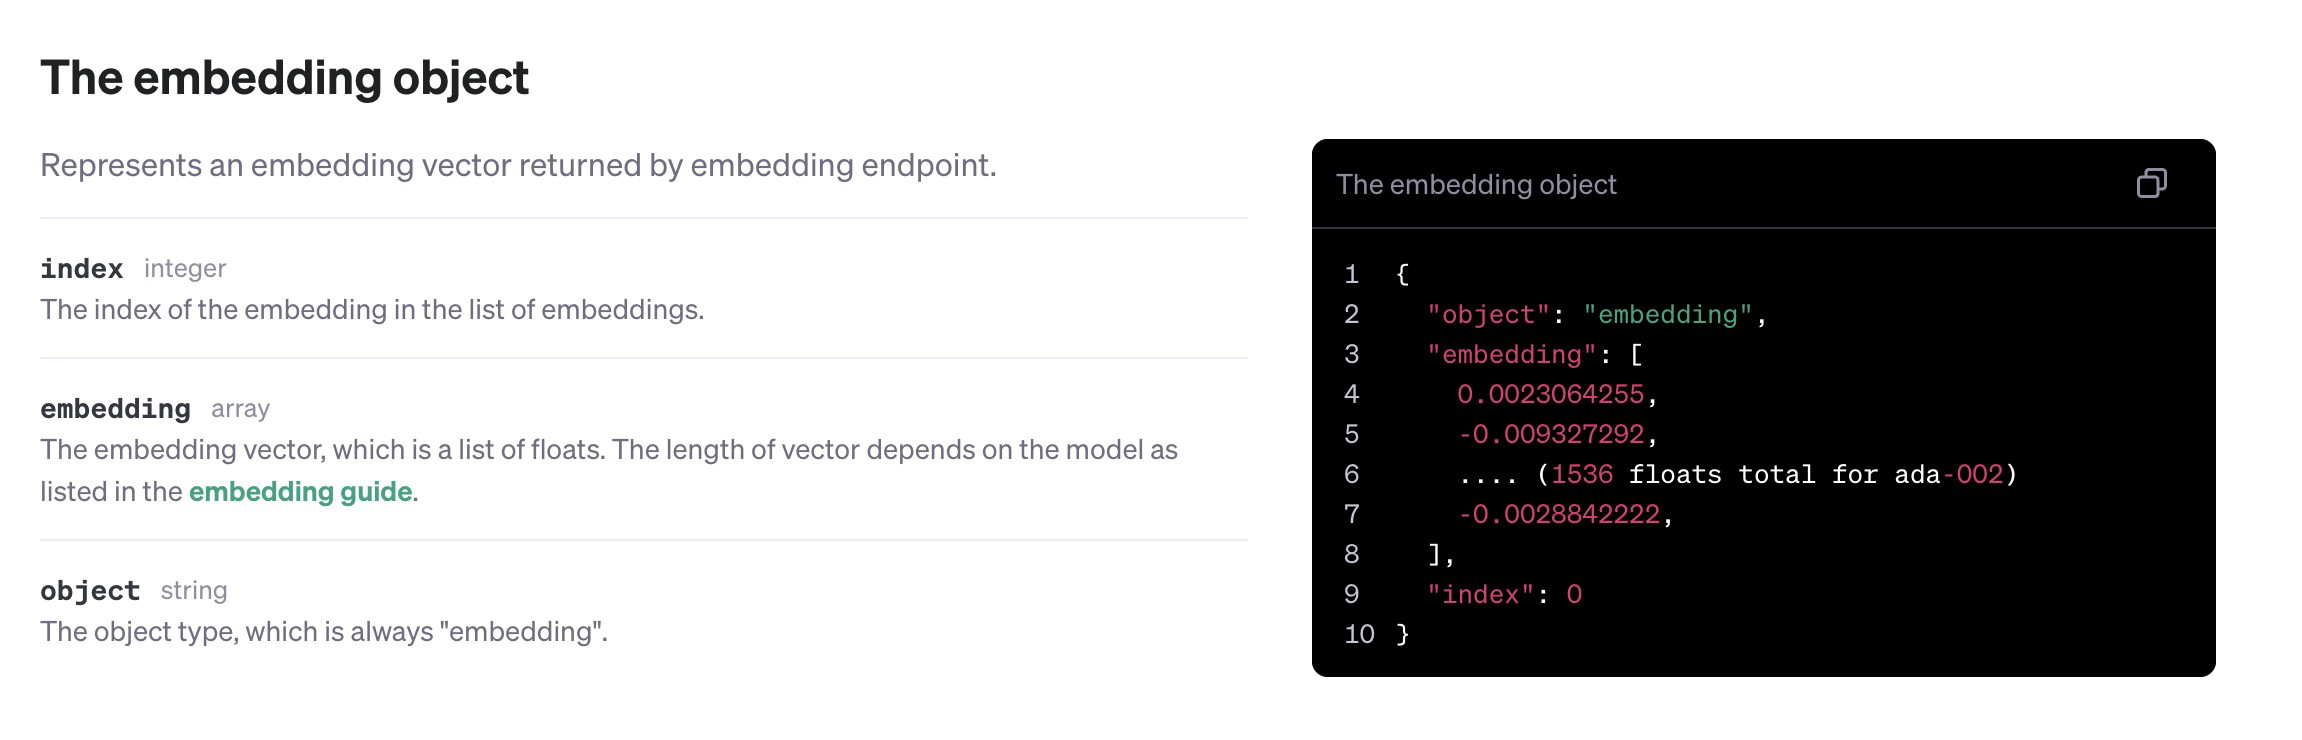

In [4]:
from openai import OpenAI
from utils import NUM_TOKENS

import tiktoken
import numpy as np

NOTE: The OpenAI embedding model embeds entire strings of text as a single vector? How? This is different than having an embedding for each vector.

---

OpenAI's embedding model is designed to represent entire strings of text as a single vector, which is indeed different from having an embedding for each word in the text. This approach allows the model to capture the overall meaning and context of the text in a single, dense representation. Here's a general overview of how it works:

1. **Input Processing**: The text string is input into the model. This could be a sentence, a paragraph, or even a longer document.

2. **Tokenization**: The input text is split into smaller units called tokens. These tokens can be words or parts of words. This tokenization helps in handling the text within the model's fixed-length processing window.

3. **Embedding Each Token**: Each token is converted into a numerical vector using an embedding layer. This layer is typically pre-trained and can understand the semantics of individual words or subwords.

4. **Contextual Embeddings**: The vectors for individual tokens are processed through several layers of the neural network (like transformers), which allows the model to adjust the embeddings of each token based on the tokens around them. This process captures the context in which each word is used, which is critical for understanding the overall meaning of the text.

5. **Aggregation**: After processing through the network, the embeddings of all tokens are aggregated to form a single vector that represents the entire string of text. This aggregation could be a simple operation like averaging or a more complex mechanism that weights some parts of the text more than others, depending on their semantic importance.

6. **Output**: The final output is a single vector that encapsulates the semantic content of the entire input text. This vector can be used in various applications such as semantic search, clustering, or as input for further machine learning models.

This approach is powerful because it allows the model to consider the entire context of the text, leading to a more accurate and nuanced representation than just considering each word independently.

In [5]:
client = OpenAI()


def get_embedding(text, model="text-embedding-3-small", dimensions=NUM_TOKENS):
    if isinstance(text, list):
        assert isinstance(text[0], str), "List of strings expected."
        text = [string.replace("\n", " ") for string in text]
        input = text
    else:
        assert isinstance(text, str), "String expected."
        text = text.replace("\n", " ")
        input = [text]
    data = client.embeddings.create(input=input, model=model, dimensions=dimensions).data
    result = [d.embedding for d in data]  # list of lists; each inner list is an embedding vector
    return result


embd = get_embedding("hello world!")  # [0].embedding
print(
    f"embd (type, len, norm): {type(embd), len(embd), np.array(embd).shape, np.linalg.norm(embd, axis=-1)} \n\t {embd}\n"
)

embd = get_embedding(["hello world!", "what's the weather like?"])
print(
    f"embd (type, len, norm): {type(embd), len(embd), np.array(embd).shape, np.linalg.norm(embd, axis=-1)} \n\t {embd}\n"
)

2024-04-30 20:17:13,374 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2024-04-30 20:17:13,493 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


embd (type, len, norm): (<class 'list'>, 1, (1, 256), array([1.00000004])) 
	 [[-0.03469745069742203, -0.06983032077550888, 0.03330955281853676, 0.05508050322532654, -0.06885062903165817, -0.08104236423969269, -0.01613771729171276, 0.10880032181739807, -0.04792330414056778, -0.050481390208005905, -0.00770147331058979, -0.04944726824760437, -0.011552209965884686, -0.04468487575650215, -0.002626120811328292, 0.09007730334997177, -0.08441685885190964, 0.020138127729296684, -0.0003040279261767864, 0.07794000208377838, 0.0777767151594162, -0.026710234582424164, 0.0019900009501725435, 0.012341407127678394, 0.050671886652708054, -0.012525099329650402, -0.08931532502174377, 0.103248730301857, 0.03265642374753952, -0.0855054035782814, 0.07554519921541214, -0.07293268293142319, 0.024002471938729286, -0.02024698257446289, 0.03197608143091202, 0.000793023849837482, 0.023471806198358536, 0.02104978635907173, -0.03597649559378624, -0.024206575006246567, -0.09192783385515213, -0.06400658935308456, 0.

In [8]:
# Let's inspect more closely the result of this API call

result = client.embeddings.create(
    input=["hello world!"], model="text-embedding-3-small", dimensions=8
)

print()
print(f"result (type, keys): {type(result), result.__dict__.keys()}\n")
print(f"result.data[0] (type, keys): {result.data[0].__dict__.keys()}\n")

2024-04-30 20:17:26,919 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"



result (type, keys): (<class 'openai.types.create_embedding_response.CreateEmbeddingResponse'>, dict_keys(['data', 'model', 'object', 'usage']))

result.data[0] (type, keys): dict_keys(['embedding', 'index', 'object'])



In general, using the dimensions parameter when creating the embedding is the suggested approach. In certain cases, you may need to change the embedding dimension after you generate it. When you change the dimension manually, you need to be sure to normalize the dimensions of the embedding as is shown below.

In [10]:
client = OpenAI()


def normalize_l2(x):
    x = np.array(x)
    if x.ndim == 1:
        norm = np.linalg.norm(x)
        if norm == 0:
            return x
        return x / norm
    else:
        norm = np.linalg.norm(x, 2, axis=1, keepdims=True)
        return np.where(norm == 0, x, x / norm)


response = client.embeddings.create(
    model="text-embedding-3-small", input="Testing 123", encoding_format="float"
)

cut_dim = response.data[0].embedding[:256]
norm_dim = normalize_l2(cut_dim)

print()
print(f"(type, len, norm): {type(norm_dim), len(norm_dim), np.linalg.norm(norm_dim)}\n")

2024-04-30 20:17:37,202 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"



(type, len, norm): (<class 'numpy.ndarray'>, 256, 1.0)



Dynamically changing the dimensions enables very flexible usage. For example, when using a vector data store that only supports embeddings up to 1024 dimensions long, developers can now still use our best embedding model text-embedding-3-large and specify a value of 1024 for the dimensions API parameter, which will shorten the embedding down from 3072 dimensions, trading off some accuracy in exchange for the smaller vector size.

In [13]:
# How can I tell how many tokens a string has before I embed it?
# In Python, you can split a string into tokens with OpenAI's tokenizer tiktoken.

# Example code:


def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens


query_str = "tiktoken is great!"
print(f"number of tokens in '{query_str}' is {num_tokens_from_string(query_str, 'cl100k_base')}.\n")

# For third-generation embedding models like text-embedding-3-small, use the cl100k_base encoding.
# More details and example code are in the OpenAI Cookbook guide how to count tokens with tiktoken.

tokenizer = tiktoken.get_encoding("cl100k_base")

print()
print(f"\ttokens: {tokenizer.encode(query_str)}\n")
print(f"\tembedding: {get_embedding(query_str)}\n")
print(f"tokenizer vocab size is {tokenizer.n_vocab}.\n")

2024-04-30 20:17:57,600 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


number of tokens in 'tiktoken is great!' is 6.


	tokens: [83, 1609, 5963, 374, 2294, 0]

	embedding: [[0.01932947151362896, -0.07690220326185226, -0.11003843694925308, 0.050327885895967484, -0.013487576507031918, -0.06472849100828171, 0.009085742756724358, 0.14667832851409912, -0.029602892696857452, -0.05187186971306801, -0.019492777064442635, -0.10344681888818741, 0.002637017983943224, -0.14952875673770905, 0.06520356237888336, 0.020146001130342484, -0.12434996664524078, -0.1106322780251503, -0.0005455899517983198, 0.09352970123291016, -0.04780406877398491, 0.15214164555072784, 0.009583082981407642, -0.006205621641129255, 0.03928247466683388, 0.0013519125059247017, -0.052436016499996185, -0.03147348761558533, 0.038183871656656265, -0.06591617316007614, 0.09899302572011948, -0.05463322252035141, 0.007144629955291748, -0.0666881650686264, 0.011594713665544987, 0.062293749302625656, -0.0027335169725120068, 0.052406325936317444, 0.08046523481607437, -0.06259067356586456, -0.0975678116083

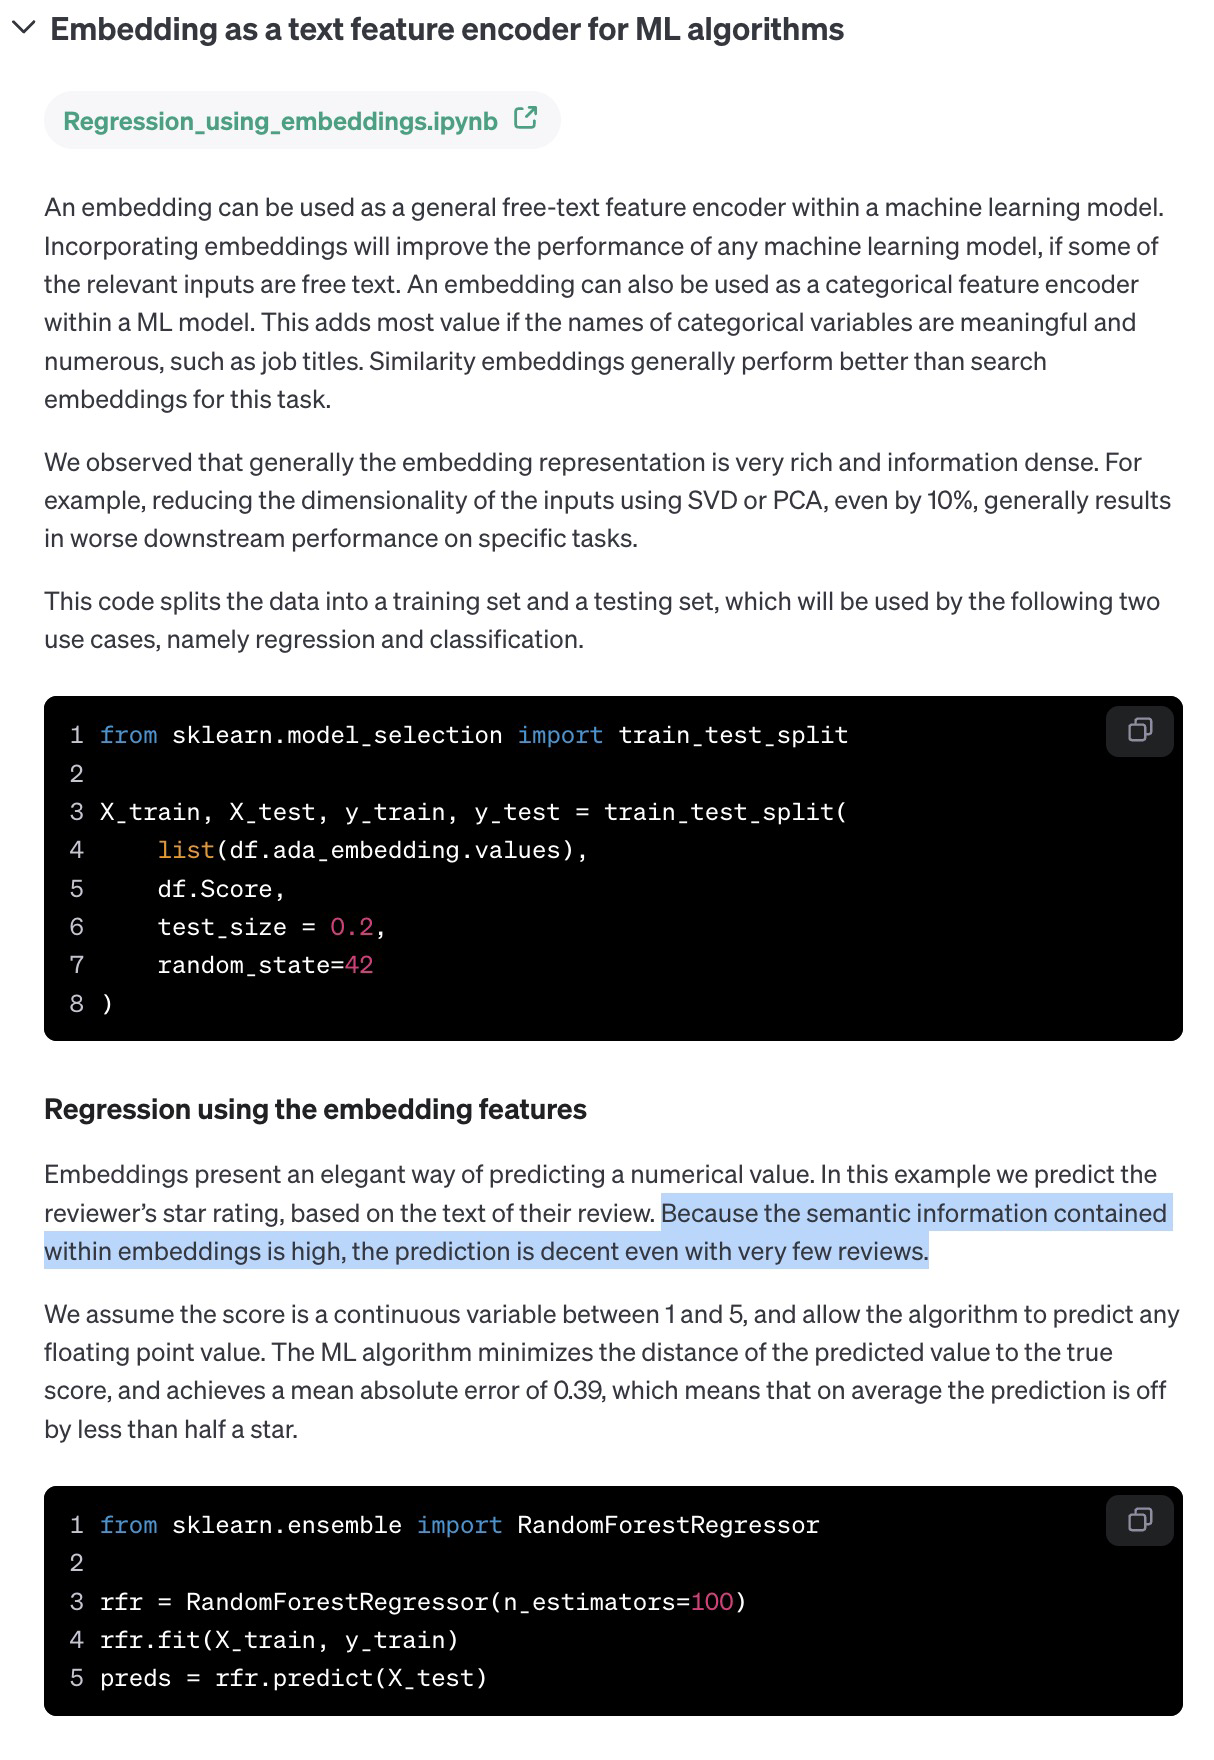